# Heart Disease Prediction System 


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [78]:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

df = pd.read_csv(url, header=None)  
df.columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
    'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
    'ca', 'thal', 'target'
]

df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

print(df.head())


    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       1  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  


### Dataset Understanding

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [80]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [81]:
print(df.shape)
total=df.isnull().sum()
print(total)


(303, 14)
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### Preprocessing

In [82]:
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)
df = df.astype(float) 


In [83]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [84]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [85]:
print(df['target'].value_counts())  # Class balance
print(df.describe())  # Summary stats
print(df.info())  # Missing/column types


target
0.0    160
1.0    137
Name: count, dtype: int64
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    3.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556

now we will convert categorical columns that are smoking and chest pain types

## Exploratory Data Analysis (EDA)

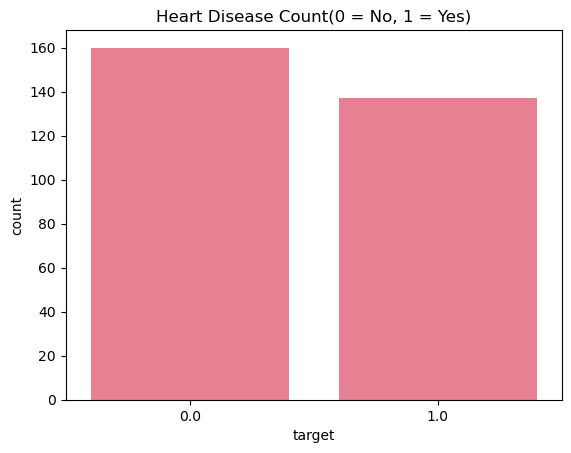

In [86]:
sns.countplot(x='target', data=df)
plt.title('Heart Disease Count(0 = No, 1 = Yes)')
plt.show()

shows there are more people who are normal and there are less person who has heart disease

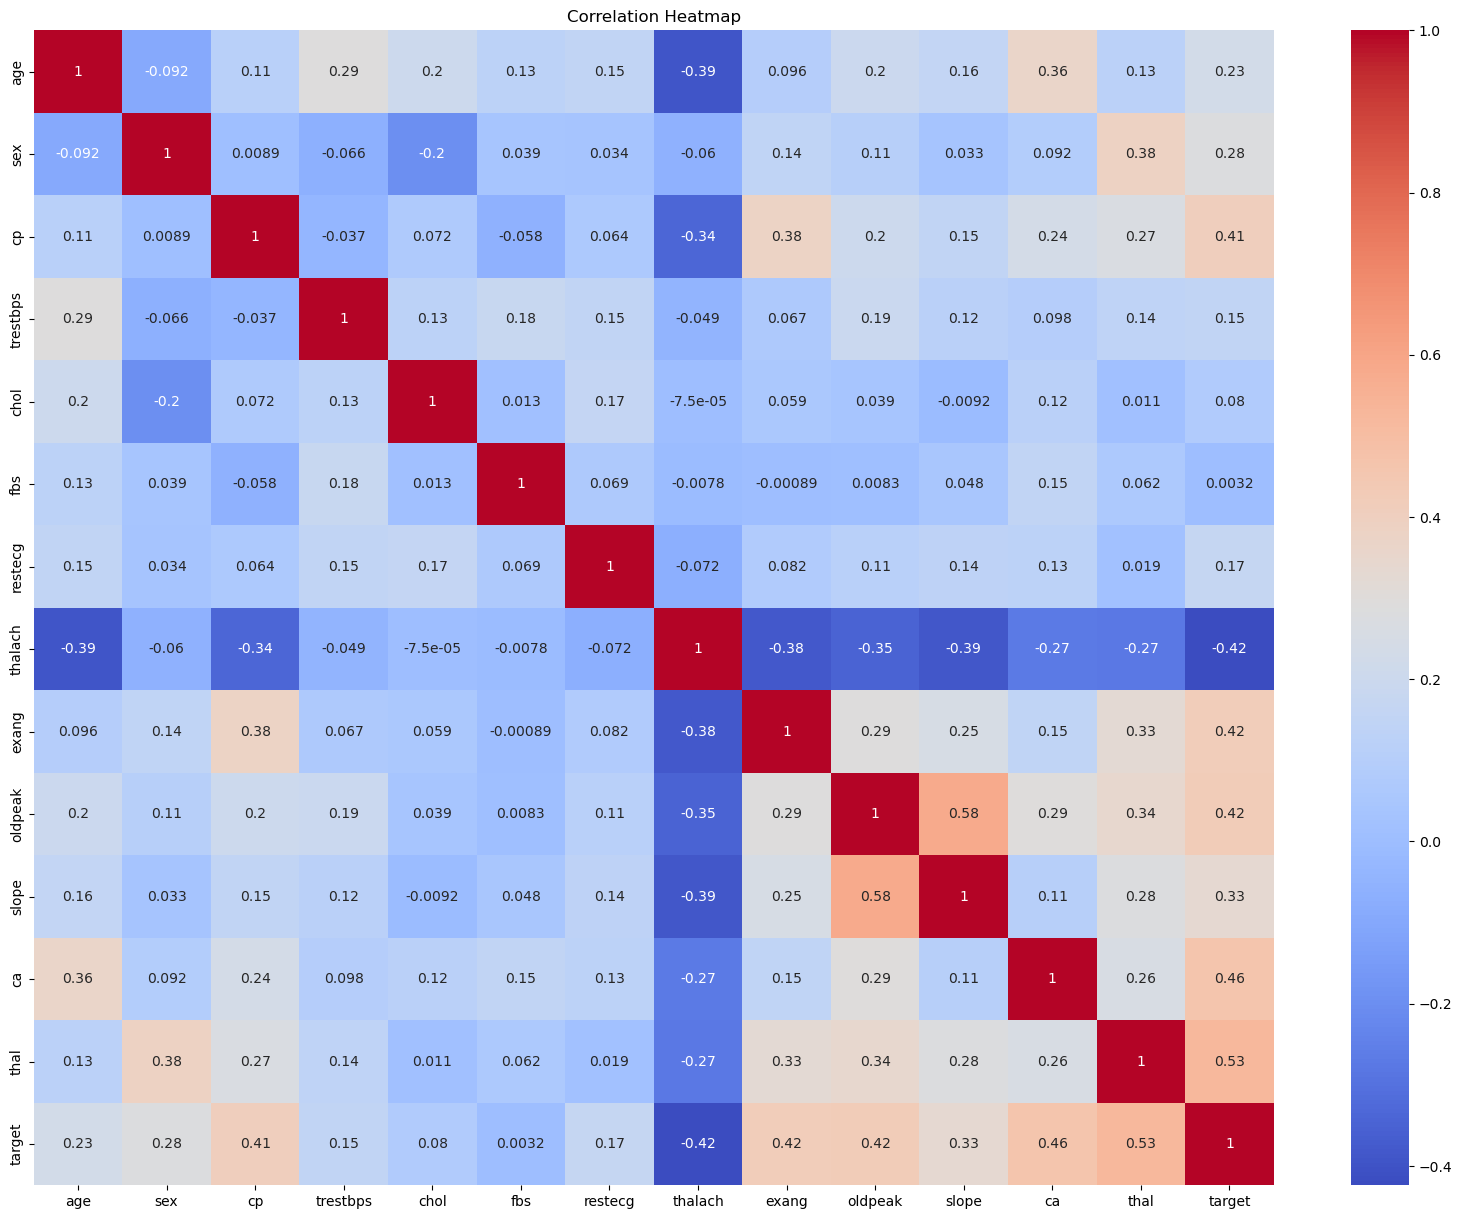

In [87]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [90]:
# Define features (X) and target (y) before train-test split
X = df.drop('target', axis=1) 
y = df['target']  # Target variable

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("Target distribution:")
print(y.value_counts())

Features shape: (297, 13)
Target shape: (297,)
Target distribution:
target
0.0    160
1.0    137
Name: count, dtype: int64


In [91]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 1. Split FIRST
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2. Apply SMOTE ONLY on training set
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# 3. Scale training & test data (fit on training only!)




it has balanced x train and y train with same amount using smote

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_bal_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)


In [93]:
print("Test target distribution:\n", y_test.value_counts(normalize=True))


Test target distribution:
 target
0.0    0.533333
1.0    0.466667
Name: proportion, dtype: float64


In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
}

for name, model in models.items():
    model.fit(X_train_bal_scaled, y_train_bal)
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name}:\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))



Logistic Regression:

[[28  4]
 [ 6 22]]
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85        32
         1.0       0.85      0.79      0.81        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60


Decision Tree:

[[26  6]
 [14 14]]
              precision    recall  f1-score   support

         0.0       0.65      0.81      0.72        32
         1.0       0.70      0.50      0.58        28

    accuracy                           0.67        60
   macro avg       0.68      0.66      0.65        60
weighted avg       0.67      0.67      0.66        60


Random Forest:

[[29  3]
 [ 7 21]]
              precision    recall  f1-score   support

         0.0       0.81      0.91      0.85        32
         1.0       0.88      0.75      0.81        28

    accuracy                           0.83        60
   macro avg  

In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

results = []

for name, model in models.items():
    model.fit(X_train_bal_scaled, y_train_bal)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else None
    })
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  Logistic Regression  0.833333   0.846154  0.785714  0.814815  0.946429
1        Decision Tree  0.666667   0.700000  0.500000  0.583333  0.754464
2        Random Forest  0.833333   0.875000  0.750000  0.807692  0.936384


we can see the accuracy, precision, recall and f1 sore and roc auc are 1 for both decision tree and random forest which is kinda suspicious so we will do cross validate

In [96]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

cv_results = []

for name, model in models.items():
    scores = cross_validate(model, X_train_bal_scaled, y_train_bal, 
                            scoring=scoring, cv=10, return_train_score=False)

    cv_results.append({
        "Model": name,
        "Accuracy": scores['test_accuracy'].mean(),
        "Precision": scores['test_precision'].mean(),
        "Recall": scores['test_recall'].mean(),
        "F1 Score": scores['test_f1'].mean(),
        "ROC-AUC": scores['test_roc_auc'].mean()
    })

cv_results_df = pd.DataFrame(cv_results)
print(cv_results_df)


                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  Logistic Regression  0.811846   0.826127  0.796154  0.804719  0.885108
1        Decision Tree  0.738462   0.743451  0.719231  0.724335  0.785281
2        Random Forest  0.839385   0.857630  0.819872  0.831952  0.906361


now i know my models are not overfitting now compare

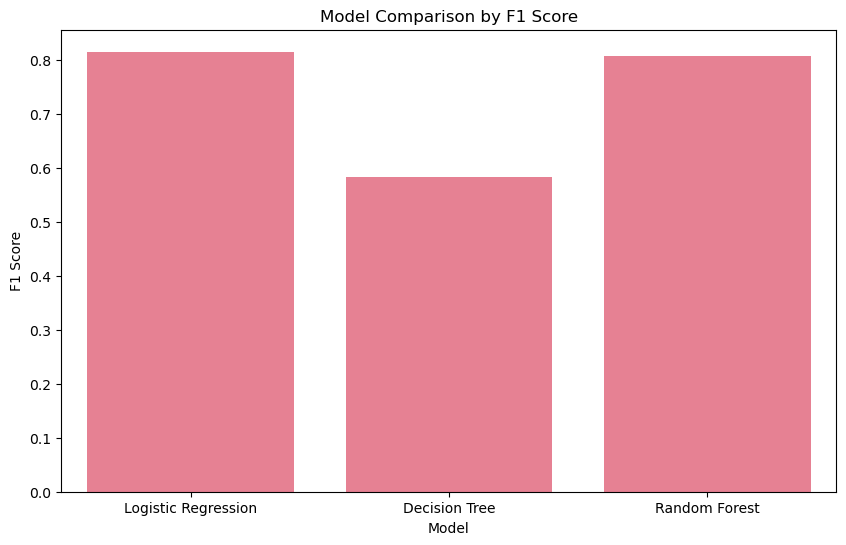

In [98]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="F1 Score", data=results_df)
plt.title("Model Comparison by F1 Score")
plt.ylabel("F1 Score")
plt.show()

In [99]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_bal_scaled, y_train_bal)

print("Best Parameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf))


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86        32
         1.0       0.85      0.82      0.84        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



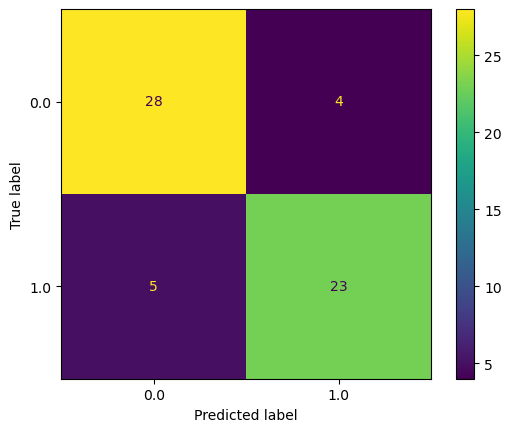

In [100]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_rf, X_test_scaled, y_test)


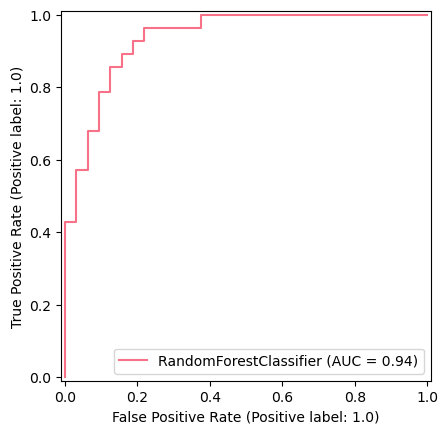

In [101]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_rf, X_test_scaled, y_test)


In [102]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RandomForestClassifier(), X_train_bal_scaled, y_train_bal, cv=5, scoring='f1')
print("F1 CV Scores:", scores)
print("Mean F1 Score:", scores.mean())


F1 CV Scores: [0.94117647 0.87719298 0.76595745 0.71111111 0.84      ]
Mean F1 Score: 0.8270876021927995


## Exporting Models 

In [103]:
import joblib
joblib.dump(scaler,'scaler.joblib')
joblib.dump(models['Logistic Regression'], 'logistic_regression.joblib')
joblib.dump(models['Decision Tree'], 'decision_tree.joblib')
joblib.dump(best_rf, 'random_forest_tuned.joblib')


['random_forest_tuned.joblib']